# Distribuzioni coniugate (2) {#sec-congiugate-families-2}

**Prerequisiti**

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az

In [2]:
seed: int = sum(map(ord, "distribuzioni_coniugate_2"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

La statistica bayesiana ci permette di aggiornare le nostre credenze iniziali o conoscenze a priori sulla distribuzione di un parametro (in questo caso, la media della popolazione) in base ai dati osservati. Questo processo di aggiornamento ci porta a ottenere una distribuzione a posteriori che riflette una nuova comprensione del parametro, integrata con le informazioni fornite dal campione.

Il concetto fondamentale è che, attraverso l'aggiornamento bayesiano, l'incertezza sulla stima del parametro si riduce. Questo è dovuto al fatto che l'informazione aggiuntiva fornita dai dati osservati consente di "restringere" la distribuzione a posteriori rispetto alla distribuzione a priori, riducendo così la varianza (o deviazione standard) della distribuzione del parametro di interesse.

In questo capitolo, approfondiremo il tema delle {ref}`distr-coniugate-1-notebook`, focalizzandoci sul modello normale-normale. Una caratteristica distintiva di questo modello è la sua capacità di auto-coniugazione rispetto a una funzione di verosimiglianza gaussiana. In termini più semplici, se la funzione di verosimiglianza segue una distribuzione gaussiana, l'adozione di una distribuzione a priori gaussiana per la media garantisce che anche la distribuzione a posteriori mantenga la sua forma gaussiana.

## Perché Usare la Distribuzione Normale?

Spesso, quando la distribuzione a posteriori è nota per essere unimodale e simmetrica, possiamo modellarla efficacemente con una distribuzione normale, anche se sappiamo che la sua forma è solo approssimativamente normale. Nei casi in cui il ricercatore abbia un'idea approssimativa di dove sia centrato un parametro sconosciuto, la distribuzione normale fornisce un metodo utile per modellare questa stima, permettendo di descrivere il livello di incertezza tramite il termine di varianza della distribuzione normale. Questa convenienza può offrire buone approssimazioni alla densità a posteriori desiderata, con la consapevolezza che, con l'aumentare dei dati osservati, tali assunzioni perdono di importanza.

Come dimostrato di seguito, il modello normale bayesiano possiede proprietà frequentiste desiderabili. Sebbene l'enfasi nell'analisi bayesiana non sia sulle stime puntuali, si può dimostrare che, con campioni sempre più grandi, la media della distribuzione a posteriori bayesiana si avvicina alla stima di massima verosimiglianza. Questa proprietà esiste perché la distribuzione a posteriori è un compromesso ponderato tra la distribuzione a priori specificata dall'utente, che in questo capitolo è normale, e la funzione di verosimiglianza derivata dai dati, anch'essa normale in questo capitolo. Con l'aumentare delle dimensioni del campione, la verosimiglianza diventa sempre più dominante in questa ponderazione.

Nel caso di una media normale, illustrato qui, la varianza della distribuzione di campionamento frequentista diminuisce con l'aumento della dimensione del campione. Nel contesto bayesiano, la riduzione della varianza media dalla funzione di verosimiglianza alla fine prevale anche su una varianza a priori deliberatamente grande. Pertanto, se si prevede che la dimensione del dataset sia grande, i ricercatori possono permettersi di essere liberali nella specificazione della varianza a priori.

## Distribuzione a Posteriori in un Contesto Normale con Varianza Nota

Consideriamo un insieme di dati $y = [y_1, y_2, \ldots, y_n]$, composto da $n$ osservazioni indipendenti e identicamente distribuite (i.i.d.) secondo una distribuzione normale $\mathcal{N}(\mu, \sigma^2)$. In questo scenario, il nostro obiettivo è stimare il valore del parametro $\mu$, che rappresenta la media della popolazione da cui provengono i dati.

### Distribuzione a Priori

Nell'approccio bayesiano, assumiamo una conoscenza iniziale sul parametro $\mu$ mediante una distribuzione a priori. In questo caso, utilizziamo una distribuzione normale coniugata, ovvero una distribuzione normale con media $\mu_0$ e varianza $\sigma_0^2$. Questa scelta riflette la nostra incertezza iniziale su $\mu$.

### Funzione di Verosimiglianza

La funzione di verosimiglianza, denotata da $p(y | \mu, \sigma)$, rappresenta la probabilità di osservare i dati $y$ dato il valore del parametro $\mu$ e la varianza nota $\sigma^2$. Per una distribuzione normale i.i.d., la funzione di verosimiglianza è data da:

$$
p(y | \mu, \sigma) = \prod_{i=1}^n \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(y_i - \mu)^2}{2\sigma^2}\right).
$$

### Teorema di Bayes e Distribuzione a Posteriori

Il teorema di Bayes combina la distribuzione a priori con la funzione di verosimiglianza per ottenere la distribuzione a posteriori del parametro $\mu$, data l'evidenza osservata $y$:

$$
p(\mu | y) = \frac{ p(y | \mu) p(\mu) }{ p(y) }.
$$

Poiché la distribuzione a priori e la funzione di verosimiglianza sono entrambe distribuzioni normali, la distribuzione a posteriori risulterà anch'essa una distribuzione normale con media a posteriori $\mu_p$ e varianza a posteriori $\sigma_p^2$.

### Formula per la Media a Posteriori ($\mu_p$)

La media a posteriori $\mu_p$ rappresenta la stima aggiornata del parametro $\mu$ alla luce delle informazioni contenute nei dati osservati. La sua formula è:

$$
\mu_p = \frac{\frac{1}{\sigma_0^2} \mu_0 + \frac{n}{\sigma^2} \bar{y}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}},
$$

dove $\bar{y}$ rappresenta la media campionaria:

$$
\bar{y} = \frac{\sum_{i=1}^n y_i}{n}.
$$

Osserviamo che $\mu_p$ è una combinazione ponderata tra la media a priori $\mu_0$ e la media campionaria $\bar{y}$. Il peso di $\bar{y}$ aumenta con il numero di osservazioni $n$, mentre il peso di $\mu_0$ diminuisce. Questo riflette il fatto che con più dati, la nostra fiducia nella media campionaria cresce, mentre l'incertezza a priori diminuisce.

### Formula per la Varianza a Posteriori ($\sigma_p^2$)

La varianza a posteriori $\sigma_p^2$ rappresenta l'incertezza residua sulla stima del parametro $\mu$ dopo aver incorporato le informazioni dai dati. La sua formula è:

$$
\sigma_p^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}.
$$

Rispetto alla varianza a priori $\sigma_0^2$, la varianza a posteriori $\sigma_p^2$ è sempre inferiore o uguale. In altre parole, l'incertezza sulla stima di $\mu$ si riduce con l'aumentare del numero di osservazioni. La varianza a posteriori rappresenta un bilanciamento tra l'incertezza a priori ($\sigma_0^2$) e l'informazione derivata dai dati ($\sigma^2/n$).

In sintesi, nel caso normale-normale con varianza nota, la distribuzione a posteriori risulta essere una distribuzione normale con una media e una varianza che riflettono un'integrazione bilanciata tra l'informazione a priori e quella ottenuta dai dati osservati. Questo approccio garantisce una stima aggiornata e affinata del parametro $\mu$ che migliora con l'aumento del numero di osservazioni.

::: {#exm-}

I test standard di QI sono progettati per misurare l'intelligenza con una media di 100 e una deviazione standard di 15. Tuttavia, si dice anche che questi test presentino bias culturali che favoriscono alcuni gruppi rispetto ad altri. Un'ulteriore complicazione si verifica quando i punteggi di QI vengono aggregati a livello nazionale, poiché le caratteristiche interne ai paesi vengono mascherate. Questo esempio analizza i dati di QI raccolti a livello internazionale (Lynn e Vanhanen, 2001) per 80 paesi da fonti nazionali pubblicate e discussi da @gill2015bayesian. L'idea chiave nella descrizione della distribuzione a posteriori è se le differenze tra le nazioni alterano la parametrizzazione prevista.

I dati di Lynn e Vanhanen (2001) sono forniti di seguito:

| Paese          | IQ  | Paese          | IQ  | Paese          | IQ  | Paese          | IQ  |
|----------------|-----|----------------|-----|----------------|-----|----------------|-----|
| Argentina      | 96  | Australia      | 98  | Austria        | 102 | Barbados       | 78  |
| Belgium        | 100 | Brazil         | 87  | Bulgaria       | 93  | Canada         | 97  |
| China          | 100 | Congo (Br.)    | 73  | Congo (Zr.)    | 65  | Croatia        | 90  |
| Cuba           | 85  | Czech Repub.   | 97  | Denmark        | 98  | Ecuador        | 80  |
| Egypt          | 83  | Eq. Guinea     | 59  | Ethiopia       | 63  | Fiji           | 84  |
| Finland        | 97  | France         | 98  | Germany        | 102 | Ghana          | 71  |
| Greece         | 92  | Guatemala      | 79  | Guinea         | 66  | Hong Kong      | 107 |
| Hungary        | 99  | India          | 81  | Indonesia      | 89  | Iran           | 84  |
| Iraq           | 87  | Ireland        | 93  | Israel         | 94  | Italy          | 102 |
| Jamaica        | 72  | Japan          | 105 | Kenya          | 72  | Korea (S.)     | 106 |
| Lebanon        | 86  | Malaysia       | 92  | Marshall I.    | 84  | Mexico         | 87  |
| Morocco        | 85  | Nepal          | 78  | Netherlands    | 102 | New Zealand    | 100 |
| Nigeria        | 67  | Norway         | 98  | Peru           | 90  | Philippines    | 86  |
| Poland         | 99  | Portugal       | 95  | Puerto Rico    | 84  | Qatar          | 78  |
| Romania        | 94  | Russia         | 96  | Samoa          | 87  | Sierra Leone   | 64  |
| Singapore      | 103 | Slovakia       | 96  | Slovenia       | 95  | South Africa   | 72  |
| Spain          | 97  | Sudan          | 72  | Suriname       | 89  | Sweden         | 101 |
| Switzerland    | 101 | Taiwan         | 104 | Tanzania       | 72  | Thailand       | 91  |
| Tonga          | 87  | Turkey         | 90  | Uganda         | 73  | U.K.           | 100 |
| U.S.           | 98  | Uruguay        | 96  | Zambia         | 77  | Zimbabwe       | 66  |


Implementiamo le informazioni necessarie in Python.

In [3]:
# Dati IQ delle 80 nazioni
iq = np.array(
    [
        96,
        100,
        100,
        85,
        83,
        97,
        92,
        99,
        87,
        72,
        86,
        85,
        67,
        99,
        94,
        103,
        97,
        101,
        87,
        98,
        87,
        73,
        97,
        59,
        98,
        79,
        81,
        93,
        105,
        92,
        78,
        98,
        95,
        96,
        72,
        104,
        90,
        96,
        98,
        102,
        78,
        90,
        63,
        84,
        84,
        107,
        86,
        102,
        106,
        94,
        102,
        72,
        101,
        89,
        72,
        101,
        91,
        100,
        100,
        66,
        107,
        86,
        78,
        84,
        78,
        64,
        72,
        101,
        91,
        100,
        67,
        86,
    ]
)

In [4]:
# Numero di osservazioni
n = len(iq)

# Media campionaria
y_bar = np.mean(iq)

# Deviazione standard nota
sigma = 15

# Parametri a priori
mu_0 = 100
sigma_0 = 15

Calcoliamo la media a posteriori con la formula discussa in precedenza

$$
\mu_p = \frac{\frac{1}{\sigma_0^2}\mu_0 + \frac{n}{\sigma^2}\bar{y}}{\frac {1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$

dove:

- $\mu_0$ è la media a priori
- $\sigma_0$ è la deviazione standard a priori
- $n$ è il numero di osservazioni
- $\sigma$ è la deviazione standard delle osservazioni (nota)
- $\bar{y}$ è la media campionaria

In [5]:
mu_p = ((1 / sigma_0**2) * mu_0 + (n / sigma**2) * y_bar) / (
    (1 / sigma_0**2) + (n / sigma**2)
)
print(f"Media a posteriori (mu_p): {mu_p}")

Media a posteriori (mu_p): 89.35616438356165


Calcoliamo la varianza a posteriori

$$
\sigma_p^2 = \frac{1}{\frac {1}{\sigma_0^2}+ \frac{n}{\sigma^2}}
$$

In [6]:
sigma_p_sq = 1 / ((1 / sigma_0**2) + (n / sigma**2))
print(f"Varianza a posteriori (sigma_p_sq): {sigma_p_sq}")

Varianza a posteriori (sigma_p_sq): 3.082191780821918


Generiamo una rappresentazione grafica della distribuzione a posteriori della media del IQ sulla base dei dati osservati, avendo assunto `mu_0` = 100 e `sigma_0` = 15 per la distribuzione a priori.

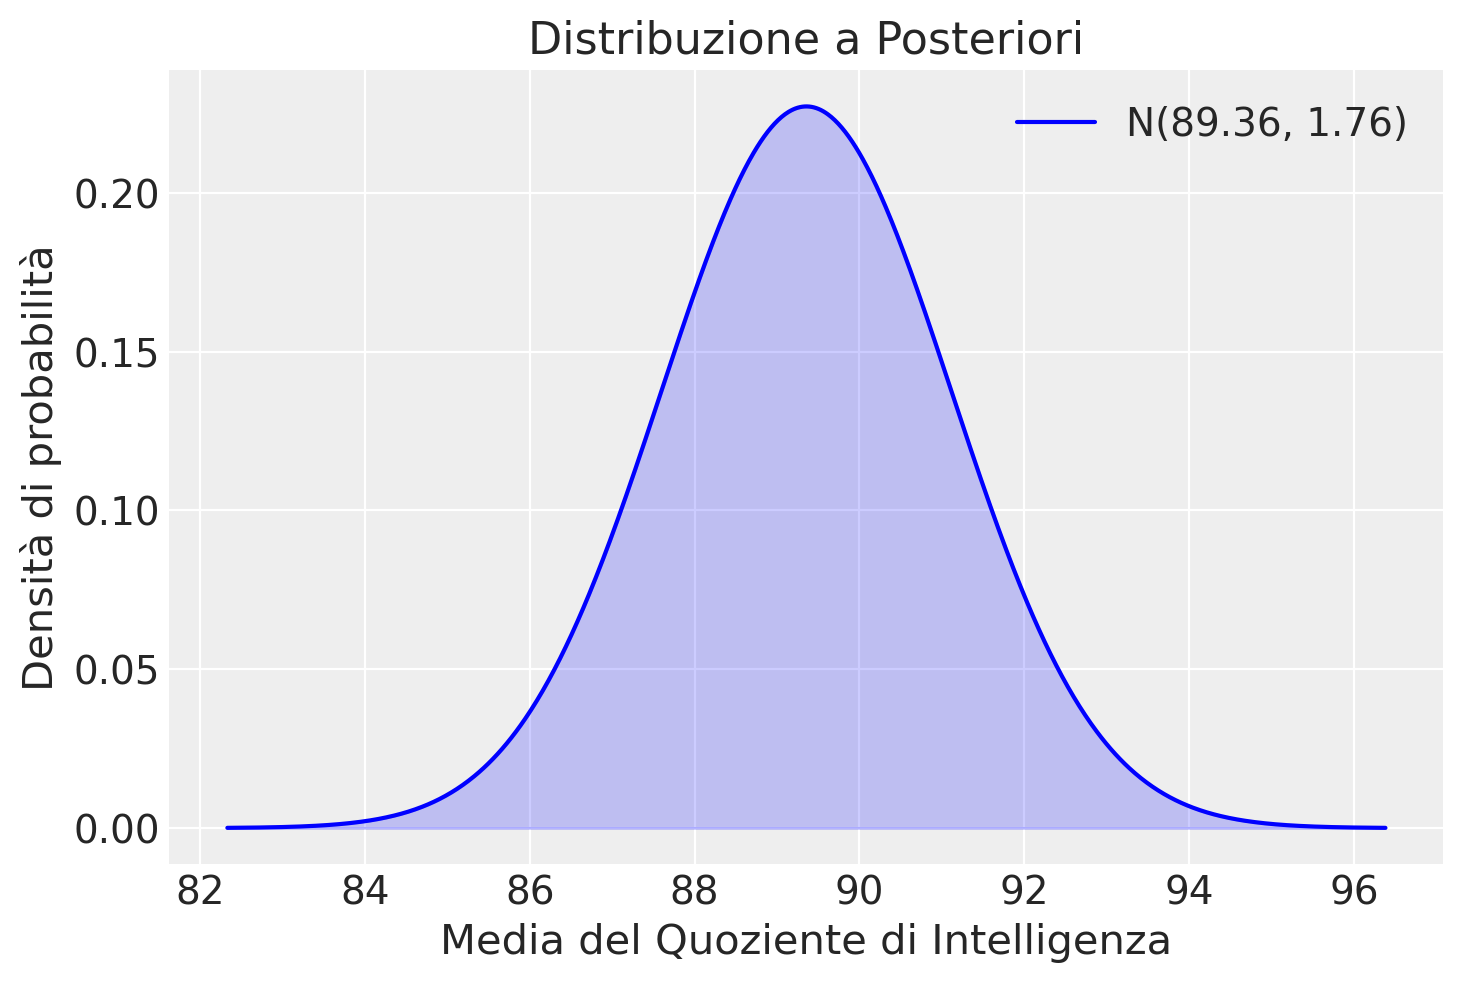

In [11]:
sigma_p = np.sqrt(sigma_p_sq)

# Definizione dei valori sull'asse x
x = np.linspace(mu_p - 4 * sigma_p, mu_p + 4 * sigma_p, 1000)

# Calcolo della densità di probabilità
pdf = stats.norm.pdf(x, mu_p, sigma_p)

# Creazione del grafico
plt.plot(x, pdf, label=f"N({mu_p:.2f}, {sigma_p:.2f})", color="blue")
plt.fill_between(x, pdf, color="blue", alpha=0.2)
plt.title("Distribuzione a Posteriori")
plt.xlabel("Media del Quoziente di Intelligenza")
plt.ylabel("Densità di probabilità")
plt.legend()
plt.show()

L'analisi condotta mediante un modello bayesiano basato sulla distribuzione normale ha prodotto un risultato interessante: la media stimata della distribuzione a posteriori del QI si attesta a 89.36, un valore sensibilmente inferiore ai 100 punti previsti come media standard. 

Tuttavia, per un'interpretazione completa di questo dato, è fondamentale adottare un approccio critico che consideri alcuni aspetti cruciali:

* La media a posteriori è ottenuta aggregando i dati QI di 80 nazioni diverse. Questo processo può innescare un **effetto di aggregazione**, dove la media "smussata" risultante non rispecchia accuratamente la distribuzione del QI a livello individuale in ogni singola nazione. Di conseguenza, le differenze tra le nazioni in termini di QI medio e variabilità potrebbero essere mascherate da questa media aggregata.
* È importante sottolineare che la media a posteriori viene calcolata utilizzando dati **non ponderati** per ogni nazione. Ciò significa che nazioni con popolazioni più piccole, anche se con punteggi QI mediamente più alti o più bassi, hanno lo stesso impatto sulla media aggregata rispetto a nazioni con popolazioni più grandi. Questo aspetto potrebbe ulteriormente distorcere la rappresentazione della vera distribuzione globale del QI.
* La deviazione osservata dalla media standard di 100 potrebbe non riflettere esclusivamente differenze nell'intelligenza media tra le nazioni, ma anche **differenze nei contesti sanitari, sociologici e politici** in cui i test sono stati somministrati. Fattori quali l'accesso all'istruzione, la qualità della nutrizione e l'esposizione a stimoli cognitivi possono influenzare i punteggi QI ottenuti e contribuire alla variabilità osservata tra le nazioni.
* Inoltre, è fondamentale considerare la possibilità di un **bias culturale** intrinseco allo strumento stesso. I test del QI sono stati originariamente progettati per un contesto specifico (paese industrializzato di lingua inglese) e potrebbero non essere adatti o culturalmente sensibili a contesti differenti. Questo potrebbe portare a una sottostima dei punteggi QI in alcune nazioni e influenzare la media a posteriori aggregata.


Questi risultati evidenziano l'importanza di un'attenta considerazione dei fattori metodologici quando si interpretano dati di test del QI a livello trans-culturale. L'effetto di aggregazione, l'utilizzo di medie non ponderate, le differenze nei contesti e il potenziale bias culturale richiedono un'analisi più approfondita che consideri questi fattori e utilizzi metodi statistici più sofisticati per ottenere una comprensione più completa delle differenze nel QI tra le nazioni.
:::

## Riflessioni Conclusive

In questa sezione, abbiamo approfondito il meccanismo dell'aggiornamento bayesiano attraverso l'implementazione del modello normale-normale. 

Il processo inizia definendo una distribuzione a priori per $\mu$, specificata da una media $\mu_0$ e una varianza $\sigma_0^2$. Dopo l'acquisizione di nuovi dati, ipotizzando che seguano una distribuzione Normale con media campionaria $\bar{y}$ e varianza nota $\sigma^2$, implementiamo il teorema normale-normale per derivare la distribuzione a posteriori del parametro.

La media della distribuzione a posteriori, denotata come $\mu_{\text{post}}$, si configura come una media ponderata tra la media a priori $ \mu_0 $ e la media campionaria $\bar{y}$, dove il peso assegnato a ciascuna media è determinato dalle rispettive varianze $\sigma_0^2$ e $\sigma^2$ della distribuzione a priori e dei dati osservati. Analogamente, la varianza a posteriori $\sigma_{\text{post}}^2$ è determinata utilizzando un'espressione che incorpora entrambe le varianze.

In sintesi, l'adozione del modello normale-normale in un contesto bayesiano facilita il calcolo delle distribuzioni a posteriori, grazie alla scelta di una distribuzione a priori Normale che mantiene la proprietà di coniugatezza, semplificando così l'intero processo analitico.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 02 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.18.0
matplotlib: 3.8.4
scipy     : 1.13.0
numpy     : 1.26.4

Watermark: 2.4.3

